## Model Evaluation

## Model Evaluation Metrics

**Regression**: MSE, MAE   
**Classification**: Classification Accuracy

In [49]:
# read the data into a pandas DataFrame
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('pima-indians-diabetes.csv', header=None, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
#Define feature and target

In [66]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

In [88]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
# Accuracy
from sklearn.metrics import accuracy_score
import numpy as np
accuracy_score(y_test, logreg.predict(X_test))

0.6927083333333334

In [115]:
from sklearn.metrics import confusion_matrix

y_prediction =logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]
confussion =confusion_matrix(y_test, y_prediction)


In [91]:
TP = confussion[1,1]
TN = confussion[0,0]
FP = confussion[0,1]
FN = confussion[1,0]

In [92]:
print( (TP + TN) / (TP + TN + FP + FN))
print(accuracy_score(y_test, y_prediction))

0.6927083333333334
0.6927083333333334


In [93]:
#Classification Error: Overal, how often is the classifier incorrect

In [94]:
# Can be calculated using 1 - accuracy
1 - accuracy_score(y_test, y_prediction)

0.30729166666666663

In [95]:
from sklearn import metrics
#Sensitivity: when the actual value is positive, how often is the prediction correct?
metrics.recall_score(y_test, y_prediction)

0.43478260869565216

In [101]:
#Specificity: When the actual value is negative, how often is the prediction correct?
specificity =TN / (TN + FP) 
specificity

0.8373983739837398

In [102]:
#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

1 - specificity

0.16260162601626016

In [107]:
# Precision: when a positive is predicted, how often prediction is correct?
print(TP/float(TP + FP))

0.6


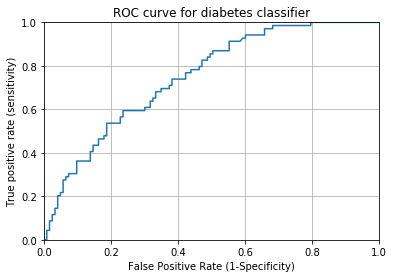

In [116]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True positive rate (sensitivity)')
plt.grid(True)